# Train/Test Dataset Distribution Analysis

This notebook analyzes the distribution of training and test datasets for the FishNet project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from collections import Counter

# Set up visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

## 1. Load Data

In [2]:
# Load train and test datasets
train_df = pd.read_csv('../datasets/anns/train.csv')
test_df = pd.read_csv('../datasets/anns/test.csv')

print(f"Train dataset shape: {train_df.shape}")
print(f"Test dataset shape: {test_df.shape}")
print(f"\nTrain columns: {train_df.columns.tolist()}")
print(f"Test columns: {test_df.columns.tolist()}")

Train dataset shape: (75631, 25)
Test dataset shape: (18901, 25)

Train columns: ['Unnamed: 0.1', 'Unnamed: 0', 'species', 'image', 'SpecCode', 'Genus', 'Subfamily', 'Family', 'Order', 'Class', 'SuperClass', 'source', 'Folder', 'Troph', 'FeedingPath', 'Tropical', 'Temperate', 'Subtropical', 'Boreal', 'Polar', 'freshwater', 'saltwater', 'brackish', 'NewOrder', 'Frequency']
Test columns: ['Unnamed: 0.1', 'Unnamed: 0', 'species', 'image', 'SpecCode', 'Genus', 'Subfamily', 'Family', 'Order', 'Class', 'SuperClass', 'source', 'Folder', 'Troph', 'FeedingPath', 'Tropical', 'Temperate', 'Subtropical', 'Boreal', 'Polar', 'freshwater', 'saltwater', 'brackish', 'NewOrder', 'Frequency']


In [3]:
# Display first few rows
print("Train dataset sample:")
print(train_df.head())
print("\nTest dataset sample:")
print(test_df.head())

Train dataset sample:
   Unnamed: 0.1  Unnamed: 0            species  \
0         61488       61488                NaN   
1         21901       21901                NaN   
2         21912       21912  Pareques iwamotoi   
3         21911       21911     Nibea maculata   
4         21910       21910                NaN   

                                               image  SpecCode        Genus  \
0           1cc71197-f08c-4f99-acf1-623327a89077.jpg       NaN     Diplodus   
1           aa3ca308-f595-4019-8bff-422c3350a65a.jpg       NaN  Aplodinotus   
2  https://www.fishbase.se/images/species/Eqiwa_u...    4660.0     Pareques   
3  https://www.fishbase.se/images/species/Nimac_u...   11003.0        Nibea   
4           3b162191-0a8a-4de7-887e-5c7d79ac36e8.jpg       NaN     Pogonias   

  Subfamily      Family            Order           Class  ... Tropical  \
0       NaN    Sparidae      Perciformes  Actinopterygii  ...      1.0   
1       NaN  Sciaenidae      Perciformes  Actinopteryg

## 2. Basic Statistics

In [4]:
# Filter out URLs and get valid local images
train_local = train_df[~train_df['image'].str.startswith('http', na=False)]
test_local = test_df[~test_df['image'].str.startswith('http', na=False)]

print(f"Total train samples: {len(train_df)}")
print(f"Local train samples (excluding URLs): {len(train_local)}")
print(f"Train URL samples: {len(train_df) - len(train_local)}")
print(f"\nTotal test samples: {len(test_df)}")
print(f"Local test samples (excluding URLs): {len(test_local)}")
print(f"Test URL samples: {len(test_df) - len(test_local)}")
print(f"\nTrain:Test ratio (local): {len(train_local)/(len(test_local) or 1):.2f}:1")

Total train samples: 75631
Local train samples (excluding URLs): 40600
Train URL samples: 35031

Total test samples: 18901
Local test samples (excluding URLs): 10406
Test URL samples: 8495

Train:Test ratio (local): 3.90:1


## 3. Class Distribution Analysis

In [5]:
# Count unique classes
train_classes = train_local['Folder'].value_counts()
test_classes = test_local['Folder'].value_counts()

# All unique classes
all_classes = set(train_local['Folder'].unique()) | set(test_local['Folder'].unique())

print(f"Number of classes in train: {len(train_classes)}")
print(f"Number of classes in test: {len(test_classes)}")
print(f"Total unique classes: {len(all_classes)}")
print(f"Classes only in train: {len(set(train_classes.index) - set(test_classes.index))}")
print(f"Classes only in test: {len(set(test_classes.index) - set(train_classes.index))}")
print(f"Classes in both: {len(set(train_classes.index) & set(test_classes.index))}")

Number of classes in train: 75
Number of classes in test: 75
Total unique classes: 75
Classes only in train: 0
Classes only in test: 0
Classes in both: 75


In [6]:
# Statistics per class
print("\nTrain class statistics:")
print(f"  Min samples per class: {train_classes.min()}")
print(f"  Max samples per class: {train_classes.max()}")
print(f"  Mean samples per class: {train_classes.mean():.2f}")
print(f"  Median samples per class: {train_classes.median():.2f}")

print("\nTest class statistics:")
print(f"  Min samples per class: {test_classes.min()}")
print(f"  Max samples per class: {test_classes.max()}")
print(f"  Mean samples per class: {test_classes.mean():.2f}")
print(f"  Median samples per class: {test_classes.median():.2f}")


Train class statistics:
  Min samples per class: 140
  Max samples per class: 2916
  Mean samples per class: 541.33
  Median samples per class: 294.00

Test class statistics:
  Min samples per class: 35
  Max samples per class: 766
  Mean samples per class: 138.75
  Median samples per class: 72.00


## 4. Visualize Distribution

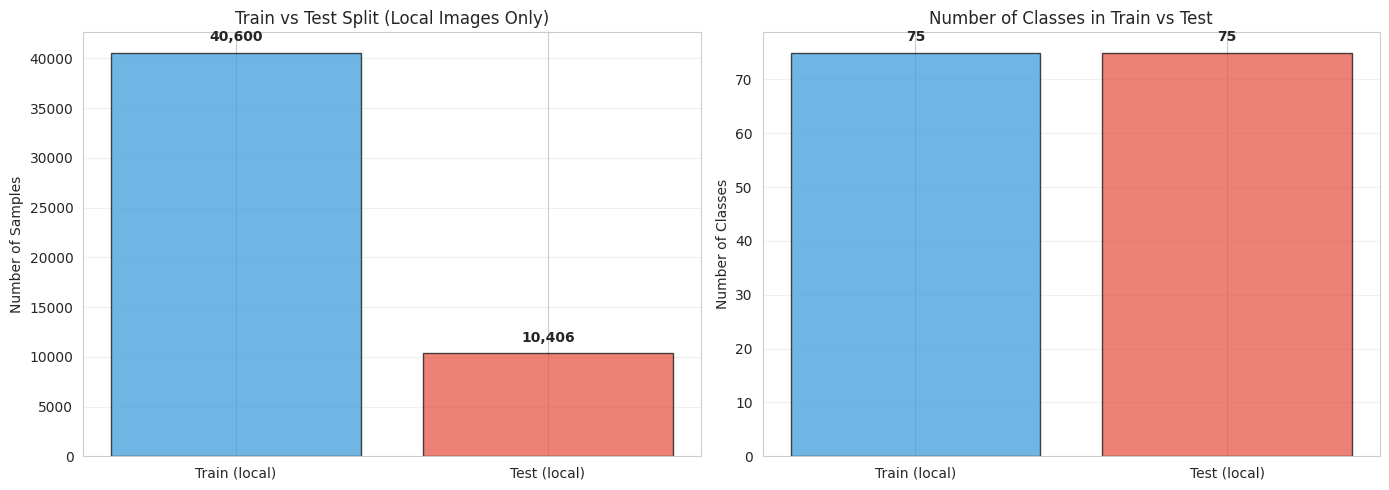

In [7]:
# Overall train vs test split
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Total samples
datasets = ['Train (local)', 'Test (local)']
counts = [len(train_local), len(test_local)]
colors = ['#3498db', '#e74c3c']

axes[0].bar(datasets, counts, color=colors, alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Number of Samples')
axes[0].set_title('Train vs Test Split (Local Images Only)')
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (dataset, count) in enumerate(zip(datasets, counts)):
    axes[0].text(i, count + max(counts)*0.02, f'{count:,}', ha='center', va='bottom', fontweight='bold')

# Number of classes
class_counts = [len(train_classes), len(test_classes)]
axes[1].bar(datasets, class_counts, color=colors, alpha=0.7, edgecolor='black')
axes[1].set_ylabel('Number of Classes')
axes[1].set_title('Number of Classes in Train vs Test')
axes[1].grid(axis='y', alpha=0.3)

for i, (dataset, count) in enumerate(zip(datasets, class_counts)):
    axes[1].text(i, count + max(class_counts)*0.02, f'{count:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

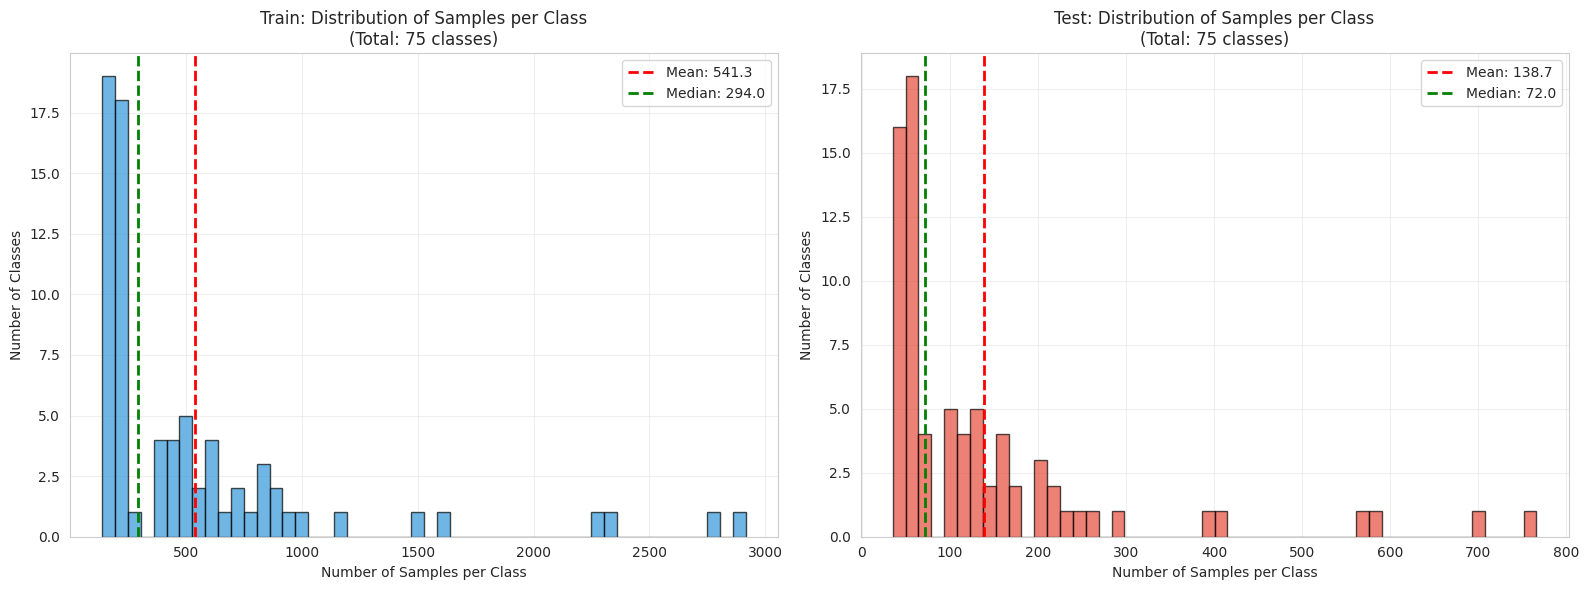

In [8]:
# Distribution of samples per class
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Train distribution
axes[0].hist(train_classes.values, bins=50, color='#3498db', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Number of Samples per Class')
axes[0].set_ylabel('Number of Classes')
axes[0].set_title(f'Train: Distribution of Samples per Class\n(Total: {len(train_classes)} classes)')
axes[0].axvline(train_classes.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {train_classes.mean():.1f}')
axes[0].axvline(train_classes.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {train_classes.median():.1f}')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Test distribution
axes[1].hist(test_classes.values, bins=50, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Number of Samples per Class')
axes[1].set_ylabel('Number of Classes')
axes[1].set_title(f'Test: Distribution of Samples per Class\n(Total: {len(test_classes)} classes)')
axes[1].axvline(test_classes.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {test_classes.mean():.1f}')
axes[1].axvline(test_classes.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {test_classes.median():.1f}')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Class Balance Analysis

In [9]:
# Top and bottom classes
print("=" * 80)
print("TOP 20 CLASSES BY SAMPLE COUNT")
print("=" * 80)
print("\nTRAIN:")
print(train_classes.head(20))

print("\n" + "=" * 80)
print("\nTEST:")
print(test_classes.head(20))

print("\n" + "=" * 80)
print("BOTTOM 20 CLASSES BY SAMPLE COUNT")
print("=" * 80)
print("\nTRAIN:")
print(train_classes.tail(20))

print("\n" + "=" * 80)
print("\nTEST:")
print(test_classes.tail(20))

TOP 20 CLASSES BY SAMPLE COUNT

TRAIN:
Folder
Labridae         2916
Centrarchidae    2802
Pomacentridae    2319
Cyprinidae       2292
Sparidae         1584
Salmonidae       1511
Acanthuridae     1147
Syngnathidae      990
Sciaenidae        966
Percidae          888
Monacanthidae     866
Cichlidae         850
Diodontidae       843
Kyphosidae        832
Ictaluridae       790
Lepisosteidae     711
Ostraciidae       710
Lutjanidae        666
Mullidae          611
Scaridae          603
Name: count, dtype: int64


TEST:
Folder
Labridae         766
Centrarchidae    702
Pomacentridae    580
Cyprinidae       573
Sparidae         412
Salmonidae       397
Acanthuridae     298
Syngnathidae     260
Sciaenidae       251
Percidae         230
Diodontidae      219
Monacanthidae    217
Kyphosidae       207
Cichlidae        204
Ictaluridae      199
Lepisosteidae    175
Ostraciidae      174
Lutjanidae       166
Scaridae         162
Mullidae         161
Name: count, dtype: int64

BOTTOM 20 CLASSES BY SAMPL

In [10]:
# Create a comparison dataframe for classes in both splits
common_classes = set(train_classes.index) & set(test_classes.index)
comparison_df = pd.DataFrame({
    'train_count': train_classes,
    'test_count': test_classes
}).fillna(0).astype(int)

# Filter to common classes for ratio analysis
common_comparison = comparison_df.loc[list(common_classes)].copy()
common_comparison['train_test_ratio'] = common_comparison['train_count'] / common_comparison['test_count'].replace(0, 1)

print(f"\nClasses appearing in both train and test: {len(common_classes)}")
print(f"\nTrain/Test ratio statistics (for common classes):")
print(f"  Min ratio: {common_comparison['train_test_ratio'].min():.2f}")
print(f"  Max ratio: {common_comparison['train_test_ratio'].max():.2f}")
print(f"  Mean ratio: {common_comparison['train_test_ratio'].mean():.2f}")
print(f"  Median ratio: {common_comparison['train_test_ratio'].median():.2f}")


Classes appearing in both train and test: 75

Train/Test ratio statistics (for common classes):
  Min ratio: 3.00
  Max ratio: 4.17
  Mean ratio: 3.88
  Median ratio: 3.91


## 6. Train/Test Ratio Visualization

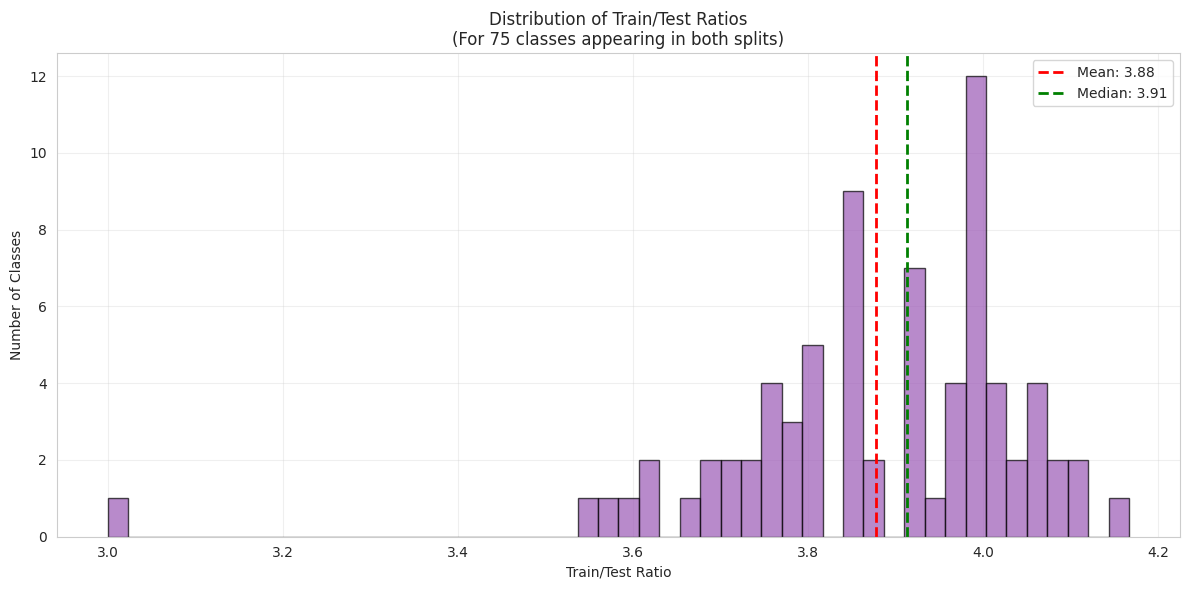

In [11]:
# Visualize train/test ratio distribution
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.hist(common_comparison['train_test_ratio'], bins=50, color='#9b59b6', alpha=0.7, edgecolor='black')
ax.set_xlabel('Train/Test Ratio')
ax.set_ylabel('Number of Classes')
ax.set_title(f'Distribution of Train/Test Ratios\n(For {len(common_classes)} classes appearing in both splits)')
ax.axvline(common_comparison['train_test_ratio'].mean(), color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {common_comparison["train_test_ratio"].mean():.2f}')
ax.axvline(common_comparison['train_test_ratio'].median(), color='green', linestyle='--', linewidth=2, 
           label=f'Median: {common_comparison["train_test_ratio"].median():.2f}')
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Imbalance Detection

In [12]:
# Calculate imbalance ratios
train_imbalance = train_classes.max() / train_classes.min()
test_imbalance = test_classes.max() / test_classes.min()

print(f"Train imbalance ratio (max/min): {train_imbalance:.2f}")
print(f"Test imbalance ratio (max/min): {test_imbalance:.2f}")

# Find classes with very few samples (potential issues)
threshold = 5
train_low = train_classes[train_classes <= threshold]
test_low = test_classes[test_classes <= threshold]

print(f"\nClasses with <= {threshold} samples in train: {len(train_low)}")
if len(train_low) > 0:
    print(train_low)

print(f"\nClasses with <= {threshold} samples in test: {len(test_low)}")
if len(test_low) > 0:
    print(test_low)

Train imbalance ratio (max/min): 20.83
Test imbalance ratio (max/min): 21.89

Classes with <= 5 samples in train: 0

Classes with <= 5 samples in test: 0


## 8. Summary Report

In [13]:
print("=" * 80)
print("FISHNET DATASET DISTRIBUTION SUMMARY")
print("=" * 80)

print(f"\n📊 OVERALL STATISTICS:")
print(f"  • Total train samples (local): {len(train_local):,}")
print(f"  • Total test samples (local): {len(test_local):,}")
print(f"  • Train:Test ratio: {len(train_local)/(len(test_local) or 1):.2f}:1")
print(f"  • Total unique classes: {len(all_classes):,}")

print(f"\n🏷️  CLASS COVERAGE:")
print(f"  • Classes in train: {len(train_classes):,}")
print(f"  • Classes in test: {len(test_classes):,}")
print(f"  • Classes in both: {len(common_classes):,}")
print(f"  • Classes only in train: {len(set(train_classes.index) - set(test_classes.index)):,}")
print(f"  • Classes only in test: {len(set(test_classes.index) - set(train_classes.index)):,}")

print(f"\n📈 TRAIN DISTRIBUTION:")
print(f"  • Min samples/class: {train_classes.min()}")
print(f"  • Max samples/class: {train_classes.max()}")
print(f"  • Mean samples/class: {train_classes.mean():.2f}")
print(f"  • Median samples/class: {train_classes.median():.0f}")
print(f"  • Imbalance ratio: {train_imbalance:.2f}")

print(f"\n📉 TEST DISTRIBUTION:")
print(f"  • Min samples/class: {test_classes.min()}")
print(f"  • Max samples/class: {test_classes.max()}")
print(f"  • Mean samples/class: {test_classes.mean():.2f}")
print(f"  • Median samples/class: {test_classes.median():.0f}")
print(f"  • Imbalance ratio: {test_imbalance:.2f}")

print(f"\n⚖️  TRAIN/TEST RATIO (Common Classes):")
print(f"  • Mean ratio: {common_comparison['train_test_ratio'].mean():.2f}")
print(f"  • Median ratio: {common_comparison['train_test_ratio'].median():.2f}")
print(f"  • Min ratio: {common_comparison['train_test_ratio'].min():.2f}")
print(f"  • Max ratio: {common_comparison['train_test_ratio'].max():.2f}")

print(f"\n⚠️  POTENTIAL ISSUES:")
print(f"  • Classes with ≤{threshold} samples in train: {len(train_low)}")
print(f"  • Classes with ≤{threshold} samples in test: {len(test_low)}")

print("\n" + "=" * 80)

FISHNET DATASET DISTRIBUTION SUMMARY

📊 OVERALL STATISTICS:
  • Total train samples (local): 40,600
  • Total test samples (local): 10,406
  • Train:Test ratio: 3.90:1
  • Total unique classes: 75

🏷️  CLASS COVERAGE:
  • Classes in train: 75
  • Classes in test: 75
  • Classes in both: 75
  • Classes only in train: 0
  • Classes only in test: 0

📈 TRAIN DISTRIBUTION:
  • Min samples/class: 140
  • Max samples/class: 2916
  • Mean samples/class: 541.33
  • Median samples/class: 294
  • Imbalance ratio: 20.83

📉 TEST DISTRIBUTION:
  • Min samples/class: 35
  • Max samples/class: 766
  • Mean samples/class: 138.75
  • Median samples/class: 72
  • Imbalance ratio: 21.89

⚖️  TRAIN/TEST RATIO (Common Classes):
  • Mean ratio: 3.88
  • Median ratio: 3.91
  • Min ratio: 3.00
  • Max ratio: 4.17

⚠️  POTENTIAL ISSUES:
  • Classes with ≤5 samples in train: 0
  • Classes with ≤5 samples in test: 0



## 9. Detailed Label Analysis - What Tasks Can We Do?

In [ ]:
# Examine all available columns and their data types
print("=" * 80)
print("AVAILABLE LABELS AND FEATURES IN THE DATASET")
print("=" * 80)

print("\n📋 Column Names and Types:")
print(train_df.dtypes)

print("\n" + "=" * 80)
print("SAMPLE VALUES FOR KEY COLUMNS")
print("=" * 80)

# Show unique values for categorical columns
categorical_cols = ['source', 'Folder', 'Order', 'Family', 'Class', 'SuperClass']
for col in categorical_cols:
    if col in train_df.columns:
        unique_count = train_df[col].nunique()
        print(f"\n{col}: {unique_count} unique values")
        if unique_count < 20:
            print(f"  Values: {sorted(train_df[col].dropna().unique())}")

### 9.1 Taxonomic Hierarchy Analysis

In [14]:
# Analyze taxonomic hierarchy: SuperClass -> Class -> Order -> Family -> Genus -> Species
taxonomy_hierarchy = {
    'SuperClass': train_local['SuperClass'].nunique(),
    'Class': train_local['Class'].nunique(),
    'Order': train_local['Order'].nunique(),
    'Family': train_local['Folder'].nunique(),  # Folder is Family
    'Genus': train_local['Genus'].nunique(),
}

print("🔬 TAXONOMIC HIERARCHY (Train Set):")
print("=" * 60)
for level, count in taxonomy_hierarchy.items():
    print(f"  {level:15s}: {count:4d} unique values")

# Show distribution
print("\n📊 TAXONOMIC LEVEL DISTRIBUTIONS:")
print("\nClass distribution:")
print(train_local['Class'].value_counts())

print("\nOrder distribution (top 15):")
print(train_local['Order'].value_counts().head(15))

print("\nFamily (Folder) distribution (top 15):")
print(train_local['Folder'].value_counts().head(15))

🔬 TAXONOMIC HIERARCHY (Train Set):
  SuperClass     :    0 unique values
  Class          :    2 unique values
  Order          :   27 unique values
  Family         :   75 unique values
  Genus          :  146 unique values

📊 TAXONOMIC LEVEL DISTRIBUTIONS:

Class distribution:
Class
Actinopterygii    37398
Elasmobranchii     3202
Name: count, dtype: int64

Order distribution (top 15):
Order
Perciformes           18350
Tetraodontiformes      3419
Cypriniformes          2538
Ovalentaria/misc       2319
Syngnathiformes        1724
Myliobatiformes        1579
Salmoniformes          1511
Siluriformes           1207
Cyprinodontiformes     1129
Scorpaeniformes         849
Lepisosteiformes        711
Mulliformes             611
Eupercaria/misc         603
Orectolobiformes        579
Anguilliformes          449
Name: count, dtype: int64

Family (Folder) distribution (top 15):
Folder
Labridae         2916
Centrarchidae    2802
Pomacentridae    2319
Cyprinidae       2292
Sparidae         1584
S

### 9.2 Ecological & Habitat Labels

In [ ]:
# Analyze habitat and climate zone labels
habitat_cols = ['freshwater', 'saltwater', 'brackish']
climate_cols = ['Tropical', 'Temperate', 'Subtropical', 'Boreal', 'Polar']

print("🌊 HABITAT TYPE DISTRIBUTION (Train Set):")
print("=" * 60)
for col in habitat_cols:
    if col in train_local.columns:
        count = train_local[col].sum()
        pct = (count / len(train_local)) * 100
        print(f"  {col:15s}: {count:6.0f} samples ({pct:5.1f}%)")

# Check for multi-habitat species
train_habitat = train_local[habitat_cols].fillna(0)
habitat_counts = train_habitat.sum(axis=1)
print(f"\n  Multi-habitat species: {(habitat_counts > 1).sum()} samples")

print("\n🌡️  CLIMATE ZONE DISTRIBUTION (Train Set):")
print("=" * 60)
for col in climate_cols:
    if col in train_local.columns:
        count = train_local[col].sum()
        pct = (count / len(train_local)) * 100
        print(f"  {col:15s}: {count:6.0f} samples ({pct:5.1f}%)")

# Check for multi-zone species
train_climate = train_local[climate_cols].fillna(0)
climate_counts = train_climate.sum(axis=1)
print(f"\n  Multi-zone species: {(climate_counts > 1).sum()} samples")

### 9.3 Behavioral & Feeding Labels

In [ ]:
# Analyze trophic level and feeding behavior
print("🍽️  TROPHIC LEVEL & FEEDING BEHAVIOR:")
print("=" * 60)

if 'Troph' in train_local.columns:
    troph_valid = train_local['Troph'].dropna()
    print(f"Trophic Level (Troph):")
    print(f"  Available: {len(troph_valid)} / {len(train_local)} samples ({len(troph_valid)/len(train_local)*100:.1f}%)")
    print(f"  Range: {troph_valid.min():.2f} - {troph_valid.max():.2f}")
    print(f"  Mean: {troph_valid.mean():.2f}")
    print(f"  Median: {troph_valid.median():.2f}")
    
    # Distribution
    print(f"\n  Distribution:")
    bins = [0, 2, 2.5, 3, 3.5, 4, 5]
    labels = ['Herbivore (<2)', 'Omnivore (2-2.5)', 'Low Carnivore (2.5-3)', 
              'Mid Carnivore (3-3.5)', 'High Carnivore (3.5-4)', 'Top Predator (>4)']
    troph_bins = pd.cut(troph_valid, bins=bins, labels=labels)
    print(troph_bins.value_counts().sort_index())

if 'FeedingPath' in train_local.columns:
    feeding_valid = train_local['FeedingPath'].dropna()
    print(f"\nFeeding Path:")
    print(f"  Available: {len(feeding_valid)} / {len(train_local)} samples ({len(feeding_valid)/len(train_local)*100:.1f}%)")
    print(f"\n  Distribution:")
    print(feeding_valid.value_counts())

### 9.4 Data Completeness Analysis

In [ ]:
# Check data completeness for each label
print("📊 LABEL COMPLETENESS (Train Set):")
print("=" * 80)
print(f"{'Label':<20} {'Available':<12} {'Missing':<12} {'Completeness':<15}")
print("=" * 80)

for col in train_local.columns:
    if col not in ['Unnamed: 0.1', 'Unnamed: 0', 'image']:
        available = train_local[col].notna().sum()
        missing = train_local[col].isna().sum()
        completeness = (available / len(train_local)) * 100
        print(f"{col:<20} {available:<12} {missing:<12} {completeness:>6.1f}%")

## 10. Potential Machine Learning Tasks

In [ ]:
print("=" * 80)
print("🎯 MACHINE LEARNING TASKS YOU CAN PERFORM")
print("=" * 80)

tasks = {
    "1. TAXONOMIC CLASSIFICATION": {
        "Family Classification (75 classes)": "Classify fish images into 75 family categories",
        "Order Classification": f"Classify into {train_local['Order'].nunique()} orders (coarser granularity)",
        "Class Classification": f"Classify into {train_local['Class'].nunique()} classes (very coarse)",
        "Hierarchical Classification": "Multi-level prediction (Order -> Family -> Genus)",
        "Genus Classification": f"Fine-grained classification into {train_local['Genus'].nunique()} genera",
    },
    
    "2. HABITAT & ENVIRONMENT PREDICTION": {
        "Freshwater/Saltwater/Brackish": "Multi-label classification for water type",
        "Climate Zone Prediction": "Multi-label: Tropical, Temperate, Subtropical, Boreal, Polar",
        "Habitat Preference": "Predict primary habitat from visual features",
    },
    
    "3. ECOLOGICAL TRAIT PREDICTION": {
        "Trophic Level Regression": "Predict trophic level (2.0-4.5) from appearance",
        "Feeding Behavior": "Classify feeding path/strategy",
        "Multi-trait Prediction": "Joint prediction of habitat + trophic level + climate",
    },
    
    "4. MULTI-TASK LEARNING": {
        "Joint Taxonomy + Ecology": "Simultaneously predict family + habitat + trophic level",
        "Auxiliary Task Learning": "Use taxonomy as auxiliary task for ecology prediction",
        "Cross-task Transfer": "Train on taxonomy, transfer to ecology prediction",
    },
    
    "5. FEW-SHOT & ZERO-SHOT LEARNING": {
        "Few-shot Family Recognition": "Recognize rare families with few samples",
        "Zero-shot Order Prediction": "Predict orders not seen during training",
        "Cross-domain Transfer": "Transfer from common to rare families",
    },
    
    "6. DOMAIN ADAPTATION": {
        "Source Adaptation": "Handle images from different sources (fishbase, iNaturalist, etc.)",
        "Quality Variation": "Adapt to various image qualities and backgrounds",
    },
    
    "7. IMBALANCED LEARNING": {
        "Class Balancing": "Handle 20:1 imbalance ratio between classes",
        "Tail Recognition": "Improve performance on rare families",
        "Progressive Learning": "Start with common, gradually add rare classes",
    },
    
    "8. REPRESENTATION LEARNING": {
        "Self-supervised Pretraining": "Learn features from unlabeled fish images",
        "Metric Learning": "Learn embeddings for fish similarity",
        "Contrastive Learning": "Train with positive/negative pairs",
    },
    
    "9. ATTRIBUTE-BASED RECOGNITION": {
        "Visual Trait Detection": "Detect morphological features (fins, stripes, etc.)",
        "Habitat Inference": "Infer habitat from body shape/coloration",
        "Eco-morphology": "Link visual features to ecological traits",
    },
    
    "10. MULTI-LABEL CLASSIFICATION": {
        "Climate Zones": "Predict all applicable climate zones",
        "Habitat Types": "Predict all water types fish can inhabit",
        "Combined Attributes": "Joint multi-label for all binary attributes",
    }
}

for category, task_list in tasks.items():
    print(f"\n{category}")
    print("-" * 80)
    for task_name, description in task_list.items():
        print(f"  • {task_name}")
        print(f"    └─ {description}")

### 10.1 Task Feasibility Assessment

In [ ]:
# Assess feasibility of different tasks based on data availability
print("=" * 80)
print("📈 TASK FEASIBILITY ASSESSMENT")
print("=" * 80)

def assess_task(label_col, task_name, task_type="classification"):
    """Assess feasibility of a task based on label availability and distribution."""
    if label_col not in train_local.columns:
        return f"❌ {task_name}: Label not available"
    
    available = train_local[label_col].notna().sum()
    pct = (available / len(train_local)) * 100
    
    if pct < 50:
        status = "⚠️  Low Feasibility"
        reason = f"Only {pct:.1f}% labels available"
    elif pct < 80:
        status = "⚡ Moderate Feasibility"
        reason = f"{pct:.1f}% labels available"
    else:
        status = "✅ High Feasibility"
        reason = f"{pct:.1f}% labels available"
    
    if task_type == "classification":
        n_classes = train_local[label_col].nunique()
        reason += f", {n_classes} classes"
    
    return f"{status} {task_name}: {reason}"

# Assess each task
print("\n🎯 PRIMARY TASKS:")
print(assess_task('Folder', 'Family Classification', 'classification'))
print(assess_task('Order', 'Order Classification', 'classification'))
print(assess_task('Class', 'Class Classification', 'classification'))
print(assess_task('Genus', 'Genus Classification', 'classification'))

print("\n🌍 HABITAT & ENVIRONMENT:")
print(assess_task('freshwater', 'Freshwater Habitat'))
print(assess_task('saltwater', 'Saltwater Habitat'))
print(assess_task('brackish', 'Brackish Habitat'))
print(assess_task('Tropical', 'Tropical Zone'))
print(assess_task('Temperate', 'Temperate Zone'))

print("\n🍽️  ECOLOGICAL TRAITS:")
print(assess_task('Troph', 'Trophic Level Prediction', 'regression'))
print(assess_task('FeedingPath', 'Feeding Behavior', 'classification'))

# Recommend best tasks
print("\n" + "=" * 80)
print("💡 RECOMMENDED TASKS (High Feasibility):")
print("=" * 80)
print("1. ✅ Family Classification (75 classes, 100% labels, current task)")
print("2. ✅ Order Classification (coarser, easier)")  
print("3. ✅ Multi-label Habitat Classification (freshwater/saltwater/brackish)")
print("4. ✅ Multi-label Climate Zone Prediction (5 zones)")
print("5. ⚡ Trophic Level Regression (if data available)")
print("6. ✅ Hierarchical Classification (Order -> Family)")
print("7. ✅ Multi-task Learning (Family + Habitat + Climate)")
print("8. ✅ Few-shot Learning (for rare families)")

## 11. Investigation: CSV vs Filesystem Discrepancy

In [15]:
# Check what's actually in the filesystem
from pathlib import Path
import os

dataset_path = Path('/home/bowen68/projects/fish/dinov3/datasets/fishnet')

# Get all directories (classes) in the filesystem
filesystem_folders = [d.name for d in dataset_path.iterdir() if d.is_dir()]
filesystem_folders_set = set(filesystem_folders)

print("=" * 80)
print("🔍 CSV vs FILESYSTEM COMPARISON")
print("=" * 80)

print(f"\n📁 Filesystem (Local Folders):")
print(f"   Total folders: {len(filesystem_folders)}")
print(f"   Sample folders: {sorted(filesystem_folders)[:10]}")

print(f"\n📄 CSV Train File:")
csv_folders_train = set(train_df['Folder'].dropna().unique())
print(f"   Unique families in train.csv: {len(csv_folders_train)}")
print(f"   Sample families: {sorted(list(csv_folders_train))[:10]}")

print(f"\n📄 CSV Test File:")
csv_folders_test = set(test_df['Folder'].dropna().unique())
print(f"   Unique families in test.csv: {len(csv_folders_test)}")

print(f"\n📄 Combined CSV (Train + Test):")
csv_folders_all = csv_folders_train | csv_folders_test
print(f"   Total unique families: {len(csv_folders_all)}")

print(f"\n⚠️  DISCREPANCY ANALYSIS:")
print(f"   Folders in filesystem: {len(filesystem_folders_set)}")
print(f"   Families in CSV files: {len(csv_folders_all)}")
print(f"   Difference: {len(filesystem_folders_set) - len(csv_folders_all)}")

🔍 CSV vs FILESYSTEM COMPARISON

📁 Filesystem (Local Folders):
   Total folders: 570
   Sample folders: ['Acanthuridae', 'Acestrorhynchidae', 'Acheilognathidae', 'Achiridae', 'Achiropsettidae', 'Acipenseridae', 'Acropomatidae', 'Adrianichthyidae', 'Aetobatidae', 'Agonidae']

📄 CSV Train File:
   Unique families in train.csv: 463
   Sample families: ['Acanthuridae', 'Acestrorhynchidae', 'Acheilognathidae', 'Achiridae', 'Acipenseridae', 'Acropomatidae', 'Adrianichthyidae', 'Aetobatidae', 'Agonidae', 'Ailiidae']

📄 CSV Test File:
   Unique families in test.csv: 463

📄 Combined CSV (Train + Test):
   Total unique families: 463

⚠️  DISCREPANCY ANALYSIS:
   Folders in filesystem: 570
   Families in CSV files: 463
   Difference: 107


In [16]:
# Investigate why train_local only has 75 families
print("\n" + "=" * 80)
print("🔎 WHY ONLY 75 FAMILIES IN train_local?")
print("=" * 80)

print(f"\nOriginal train_df:")
print(f"   Total rows: {len(train_df)}")
print(f"   Unique families: {train_df['Folder'].nunique()}")
print(f"   Non-null families: {train_df['Folder'].notna().sum()}")

print(f"\nAfter filtering URLs (train_local):")
print(f"   Total rows: {len(train_local)}")
print(f"   Unique families: {train_local['Folder'].nunique()}")
print(f"   Non-null families: {train_local['Folder'].notna().sum()}")

print(f"\n📊 Image source distribution in train_df:")
train_df['is_url'] = train_df['image'].str.startswith('http', na=False)
print(train_df.groupby('is_url').agg({
    'image': 'count',
    'Folder': 'nunique'
}).rename(columns={'image': 'count', 'Folder': 'unique_families'}))

print(f"\n🔍 Where are the missing families?")
all_families_in_csv = set(train_df['Folder'].dropna().unique())
families_in_local = set(train_local['Folder'].dropna().unique())
families_only_urls = all_families_in_csv - families_in_local

print(f"   Families with ONLY URL images (no local): {len(families_only_urls)}")
print(f"   These families: {sorted(list(families_only_urls))[:20]}...")

# Check if local images exist for these families
print(f"\n💡 Checking if local images exist on filesystem...")
missing_but_exist_on_disk = []
for family in list(families_only_urls)[:10]:
    family_path = dataset_path / family
    if family_path.exists():
        num_images = len(list(family_path.glob('*.jpg'))) + len(list(family_path.glob('*.png')))
        if num_images > 0:
            missing_but_exist_on_disk.append((family, num_images))

if missing_but_exist_on_disk:
    print(f"\n⚠️  Found {len(missing_but_exist_on_disk)} families with local images NOT in CSV!")
    for fam, count in missing_but_exist_on_disk[:10]:
        print(f"   {fam}: {count} images")


🔎 WHY ONLY 75 FAMILIES IN train_local?

Original train_df:
   Total rows: 75631
   Unique families: 463
   Non-null families: 75631

After filtering URLs (train_local):
   Total rows: 40600
   Unique families: 75
   Non-null families: 40600

📊 Image source distribution in train_df:
        count  unique_families
is_url                        
False   40600               75
True    35031              463

🔍 Where are the missing families?
   Families with ONLY URL images (no local): 388
   These families: ['Acestrorhynchidae', 'Acheilognathidae', 'Achiridae', 'Acipenseridae', 'Acropomatidae', 'Adrianichthyidae', 'Agonidae', 'Ailiidae', 'Akysidae', 'Albulidae', 'Alepisauridae', 'Alepocephalidae', 'Alestidae', 'Alopiidae', 'Ambassidae', 'Amblycipitidae', 'Amblyopsidae', 'Ammodytidae', 'Amphiliidae', 'Anabantidae']...

💡 Checking if local images exist on filesystem...

⚠️  Found 10 families with local images NOT in CSV!
   Lampridae: 8 images
   Hemiodontidae: 24 images
   Carapidae: 34 i

In [17]:
print("\n" + "=" * 80)
print("📋 SUMMARY: UNDERSTANDING THE DATA SPLITS")
print("=" * 80)

print("""
🎯 THE ISSUE:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Your train.csv and test.csv files are a CURATED SUBSET of the full dataset!

📊 DATA BREAKDOWN:
  
  Filesystem (Full Dataset):
    • 570 family folders
    • All images collected from various sources
  
  CSV Files (Curated Subset):
    • 463 families have ANY images listed in CSVs
    • BUT many of these are only URL references (FishBase links)
  
  Local Images in CSV (What extract_features.py uses):
    • Only 75 families have LOCAL image files referenced
    • 40,600 train images + 10,406 test images
    • 388 families are ONLY available as URLs (not downloaded)
  
  Additional Local Images (NOT in CSV):
    • ~107 families exist in filesystem but NOT in train.csv/test.csv
    • These were not included in your curated split
    • Example: Lampridae, Hemiodontidae, Clariidae, etc.

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

💡 WHAT THIS MEANS:

1. Current Training (with CSV):
   ✓ Clean, curated dataset with 75 families
   ✓ Controlled train/test split
   ✓ Known data quality
   
2. If You Want ALL 570 Families:
   ⚠️  You need to:
   - Create new train/test split from filesystem directly
   - OR update CSV files to include all local images
   - Some families will have very few samples
   - Quality may vary significantly

3. The 388 "URL-only" Families:
   ⚠️  These exist in CSV but not as local files
   - You'd need to download from FishBase URLs
   - May have different image quality/format
   - Copyright/licensing considerations
""")

print("\n" + "=" * 80)


📋 SUMMARY: UNDERSTANDING THE DATA SPLITS

🎯 THE ISSUE:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Your train.csv and test.csv files are a CURATED SUBSET of the full dataset!

📊 DATA BREAKDOWN:

  Filesystem (Full Dataset):
    • 570 family folders
    • All images collected from various sources

  CSV Files (Curated Subset):
    • 463 families have ANY images listed in CSVs
    • BUT many of these are only URL references (FishBase links)

  Local Images in CSV (What extract_features.py uses):
    • Only 75 families have LOCAL image files referenced
    • 40,600 train images + 10,406 test images
    • 388 families are ONLY available as URLs (not downloaded)

  Additional Local Images (NOT in CSV):
    • ~107 families exist in filesystem but NOT in train.csv/test.csv
    • These were not included in your curated split
    • Example: Lampridae, Hemiodontidae, Clariidae, etc.

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### 11.1 Options to Use All 570 Families

In [18]:
print("=" * 80)
print("🛠️  OPTIONS TO USE ALL 570 FAMILIES")
print("=" * 80)

print("""
OPTION 1: Use extract_features.py WITHOUT CSV files
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
The extract_features.py script has fallback logic for folder-based datasets!

Usage:
  python extract_features.py \\
    --dataset-root /home/bowen68/projects/fish/dinov3/datasets/fishnet \\
    --output-dir artifacts/fishnet_all570/features \\
    --weights weights/dinov3_vits16_pretrain_lvd1689m-08c60483.pth \\
    --val-ratio 0.15 \\
    --test-ratio 0.15
  
What happens:
  • Scans /datasets/fishnet/ and finds all 570 folders
  • Creates ImageFolder dataset from filesystem
  • Automatically splits: 70% train / 15% val / 15% test
  • Generates features for all classes
  
Pros:
  ✓ Simple - no CSV needed
  ✓ Uses ALL local images
  ✓ Automatic splitting with seed control
  
Cons:
  ⚠️  Random split (not the same as your curated CSV split)
  ⚠️  May include low-quality images
  ⚠️  No metadata (habitat, trophic level, etc.)


OPTION 2: Create comprehensive CSV files for all local images
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Scan filesystem and generate new train.csv/test.csv with all images

Pseudocode:
  1. Iterate through all 570 folders
  2. For each image, create CSV entry
  3. Split into train/test (80/20 or custom)
  4. Optionally merge with existing CSV metadata

Pros:
  ✓ Full control over train/test split
  ✓ Can preserve some curated metadata
  ✓ Reproducible splits
  
Cons:
  ⚠️  Need to write script to generate CSV
  ⚠️  Missing metadata for new families


OPTION 3: Hybrid - Extend existing CSV files
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Keep 75 curated families + add the missing 495 families

Steps:
  1. Keep existing train.csv/test.csv as-is
  2. Scan for families NOT in CSV
  3. Generate entries for missing families
  4. Append to CSV files
  5. Re-run extract_features.py
  
Pros:
  ✓ Preserves curated subset quality
  ✓ Adds new families incrementally
  ✓ Can use metadata for curated subset
  
Cons:
  ⚠️  Mixed quality (curated + raw)
  ⚠️  Missing metadata for new families


RECOMMENDATION:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
For quick experimentation: Use OPTION 1 (no CSV, folder-based)
For production/research: Use OPTION 2 or 3 (create comprehensive CSV)

The extract_features.py script ALREADY supports Option 1!
Just don't pass --ann-root and it will use ImageFolder mode.
""")

print("=" * 80)

🛠️  OPTIONS TO USE ALL 570 FAMILIES

OPTION 1: Use extract_features.py WITHOUT CSV files
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
The extract_features.py script has fallback logic for folder-based datasets!

Usage:
  python extract_features.py \
    --dataset-root /home/bowen68/projects/fish/dinov3/datasets/fishnet \
    --output-dir artifacts/fishnet_all570/features \
    --weights weights/dinov3_vits16_pretrain_lvd1689m-08c60483.pth \
    --val-ratio 0.15 \
    --test-ratio 0.15

What happens:
  • Scans /datasets/fishnet/ and finds all 570 folders
  • Creates ImageFolder dataset from filesystem
  • Automatically splits: 70% train / 15% val / 15% test
  • Generates features for all classes

Pros:
  ✓ Simple - no CSV needed
  ✓ Uses ALL local images
  ✓ Automatic splitting with seed control

Cons:
  ⚠️  Random split (not the same as your curated CSV split)
  ⚠️  May include low-quality images
  ⚠️  No metadata (habitat, trophic level, etc.)


OPTION 2: Create comprehensive C

### 11.2 Quick Analysis: All 570 Families

In [19]:
# Quick scan of all families in filesystem
import glob

print("🔍 Scanning all 570 families in filesystem...")
family_counts = {}

for folder in filesystem_folders:
    folder_path = dataset_path / folder
    # Count jpg and png images
    images = list(folder_path.glob('*.jpg')) + list(folder_path.glob('*.png')) + \
             list(folder_path.glob('*.jpeg')) + list(folder_path.glob('*.JPG'))
    family_counts[folder] = len(images)

# Sort by count
sorted_families = sorted(family_counts.items(), key=lambda x: x[1], reverse=True)

print(f"\n📊 FILESYSTEM STATISTICS (All 570 Families):")
print("=" * 80)
total_images = sum(family_counts.values())
print(f"Total images: {total_images:,}")
print(f"Total families: {len(family_counts)}")
print(f"Mean images/family: {total_images/len(family_counts):.1f}")
print(f"Median images/family: {sorted([c for f, c in sorted_families])[len(sorted_families)//2]}")

print(f"\n📈 Top 20 families by image count:")
for i, (family, count) in enumerate(sorted_families[:20], 1):
    in_csv = "✓ in CSV" if family in csv_folders_all else "✗ NOT in CSV"
    print(f"  {i:2d}. {family:30s}: {count:5d} images  [{in_csv}]")

print(f"\n📉 Bottom 20 families by image count:")
for i, (family, count) in enumerate(sorted_families[-20:], 1):
    in_csv = "✓ in CSV" if family in csv_folders_all else "✗ NOT in CSV"
    print(f"  {i:2d}. {family:30s}: {count:5d} images  [{in_csv}]")

# Count families with very few images
few_images = [(f, c) for f, c in sorted_families if c < 10]
print(f"\n⚠️  Families with < 10 images: {len(few_images)}")
print(f"    Families with < 5 images: {len([(f, c) for f, c in sorted_families if c < 5])}")

🔍 Scanning all 570 families in filesystem...

📊 FILESYSTEM STATISTICS (All 570 Families):
Total images: 94,805
Total families: 570
Mean images/family: 166.3
Median images/family: 20

📈 Top 20 families by image count:
   1. Labridae                      :  5978 images  [✓ in CSV]
   2. Pomacentridae                 :  4288 images  [✓ in CSV]
   3. Cyprinidae                    :  4192 images  [✓ in CSV]
   4. Centrarchidae                 :  3635 images  [✓ in CSV]
   5. Gobiidae                      :  3182 images  [✓ in CSV]
   6. Cichlidae                     :  2878 images  [✓ in CSV]
   7. Sparidae                      :  2345 images  [✓ in CSV]
   8. Salmonidae                    :  2291 images  [✓ in CSV]
   9. Serranidae                    :  2285 images  [✓ in CSV]
  10. Acanthuridae                  :  1807 images  [✓ in CSV]
  11. Syngnathidae                  :  1695 images  [✓ in CSV]
  12. Sciaenidae                    :  1640 images  [✓ in CSV]
  13. Percidae             

## 12. Final Recommendations

In [20]:
print("=" * 80)
print("🎯 FINAL ANSWER: WHY 75 vs 570 FAMILIES?")
print("=" * 80)

print("""
YOUR DISCOVERY:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

1. Your CSV files (train.csv/test.csv) are CURATED:
   • Only 75 families have local images referenced in the CSVs
   • 388 other families are listed but only as URLs (not downloaded yet)
   • The CSVs provide metadata (habitat, trophic level, etc.)

2. Your filesystem has ALL collected images:
   • 570 total family folders
   • Includes the 75 curated families
   • Plus ~495 additional families collected but not yet curated

3. When you run extract_features.py WITH --ann-root:
   • It uses the CSV files
   • Only processes the 75 families with local images in CSV
   • Ignores families not mentioned in CSV

4. Your existing feature extraction used Option #1:
   • That's why you only have 75 classes
   • That's why train_local shows 75 unique families


WHAT TO DO NEXT:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

OPTION A: Keep working with 75 curated families (RECOMMENDED FOR NOW)
  ✓ High-quality, curated subset
  ✓ Has rich metadata (habitat, trophic level, climate zones)
  ✓ Already split and ready to use
  ✓ Good for initial experiments and baseline
  
  Command (current):
    Already done! You're using the 75-class dataset.


OPTION B: Switch to ALL 570 families from filesystem
  ⚡ More diverse, larger dataset
  ⚡ 7.6x more classes
  ⚠️  No metadata (habitat, trophic levels, etc.)
  ⚠️  Mixed quality (some classes may have very few images)
  ⚠️  Need to re-run feature extraction
  
  Command:
    python dinov3/projects/fishnet2/extract_features.py \\
      --dataset-root datasets/fishnet \\
      --output-dir artifacts/fishnet_all570/features \\
      --weights weights/dinov3_vits16_pretrain_lvd1689m-08c60483.pth \\
      --val-ratio 0.15 \\
      --test-ratio 0.15 \\
      --batch-size 128
  
  Note: Don't pass --ann-root to use filesystem mode!


MY RECOMMENDATION:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Start with the 75 curated families:
  1. Establishes a strong baseline
  2. Allows you to experiment with multi-task learning (family + habitat + ecology)
  3. Proves your pipeline works
  
Then expand to 570 families:
  1. Shows scalability
  2. More challenging few-shot/long-tail learning problem
  3. Can compare: does more data help despite lower quality?
  
This gives you TWO datasets for your paper:
  • FishNet-75: Curated, multi-label (family + ecology)
  • FishNet-570: Large-scale, family-only (challenging long-tail)
""")

print("=" * 80)

🎯 FINAL ANSWER: WHY 75 vs 570 FAMILIES?

YOUR DISCOVERY:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

1. Your CSV files (train.csv/test.csv) are CURATED:
   • Only 75 families have local images referenced in the CSVs
   • 388 other families are listed but only as URLs (not downloaded yet)
   • The CSVs provide metadata (habitat, trophic level, etc.)

2. Your filesystem has ALL collected images:
   • 570 total family folders
   • Includes the 75 curated families
   • Plus ~495 additional families collected but not yet curated

3. When you run extract_features.py WITH --ann-root:
   • It uses the CSV files
   • Only processes the 75 families with local images in CSV
   • Ignores families not mentioned in CSV

4. Your existing feature extraction used Option #1:
   • That's why you only have 75 classes
   • That's why train_local shows 75 unique families


WHAT TO DO NEXT:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

OPT

### 12.1 Classes with Only One Image

In [21]:
# Analyze classes with only one image
print("=" * 80)
print("⚠️  CLASSES WITH ONLY ONE IMAGE")
print("=" * 80)

# Get classes with exactly 1 image
single_image_classes = [(family, count) for family, count in family_counts.items() if count == 1]

print(f"\n📊 SUMMARY:")
print(f"   Total families in filesystem: {len(family_counts)}")
print(f"   Families with only 1 image: {len(single_image_classes)}")
print(f"   Percentage: {len(single_image_classes)/len(family_counts)*100:.1f}%")

if single_image_classes:
    print(f"\n📋 LIST OF FAMILIES WITH ONLY 1 IMAGE:")
    print("   " + "-" * 76)
    for i, (family, count) in enumerate(sorted(single_image_classes), 1):
        in_csv = "✓" if family in csv_folders_all else "✗"
        print(f"   {i:3d}. {family:40s} [In CSV: {in_csv}]")
else:
    print(f"\n✅ No families with only 1 image found!")

# Also show classes with 2-5 images (also problematic)
print(f"\n" + "=" * 80)
print("⚠️  CLASSES WITH VERY FEW IMAGES (2-5)")
print("=" * 80)

very_few_classes = [(family, count) for family, count in family_counts.items() if 2 <= count <= 5]
print(f"\n   Families with 2-5 images: {len(very_few_classes)}")

if very_few_classes:
    print(f"\n   Top 20 (sorted by count):")
    for family, count in sorted(very_few_classes, key=lambda x: x[1])[:20]:
        in_csv = "✓" if family in csv_folders_all else "✗"
        print(f"      {family:40s}: {count} images [In CSV: {in_csv}]")

# Overall statistics for problematic classes
print(f"\n" + "=" * 80)
print("📈 OVERALL PROBLEMATIC CLASSES STATISTICS")
print("=" * 80)

thresholds = [1, 5, 10, 20, 50]
for thresh in thresholds:
    count = len([f for f, c in family_counts.items() if c <= thresh])
    pct = count / len(family_counts) * 100
    print(f"   Families with ≤ {thresh:2d} images: {count:3d} ({pct:5.1f}%)")

print(f"\n💡 RECOMMENDATION:")
print(f"   For training, consider filtering out classes with < 5-10 images")
print(f"   This would remove {len([f for f, c in family_counts.items() if c < 10])} families")
print(f"   Leaving {len([f for f, c in family_counts.items() if c >= 10])} families for training")

⚠️  CLASSES WITH ONLY ONE IMAGE

📊 SUMMARY:
   Total families in filesystem: 570
   Families with only 1 image: 37
   Percentage: 6.5%

📋 LIST OF FAMILIES WITH ONLY 1 IMAGE:
   ----------------------------------------------------------------------------
     1. Anchariidae                              [In CSV: ✗]
     2. Atherionidae                             [In CSV: ✗]
     3. Austroglanididae                         [In CSV: ✗]
     4. Barbuccidae                              [In CSV: ✗]
     5. Bathysauridae                            [In CSV: ✗]
     6. Caesioscorpididae                        [In CSV: ✗]
     7. Cetomimidae                              [In CSV: ✗]
     8. Cheimarrichthyidae                       [In CSV: ✗]
     9. Congiopodidae                            [In CSV: ✗]
    10. Dichistiidae                             [In CSV: ✗]
    11. Eleginopidae                             [In CSV: ✗]
    12. Ellopostomatidae                         [In CSV: ✗]
    13. Ereuni